<a href="https://colab.research.google.com/github/Shreyaar12/TimeSeriesForecasting/blob/main/Time_Series_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/2022+2023.csv')

In [ ]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³)
0,01-01-2022,208.840000,254.510000,32.200000,26.860000,40.470000,28.740000,14.130000,2.420000,13.340000,11.920000
1,02-01-2022,240.990000,304.710000,35.100000,28.880000,43.900000,28.130000,15.780000,1.950000,13.620000,13.650000
2,03-01-2022,211.720000,265.120000,33.080000,28.230000,41.640000,28.630000,15.420000,1.540000,15.090000,15.890000
3,04-01-2022,168.090000,213.670000,39.080000,31.680000,48.460000,28.410000,18.600000,2.710000,13.090000,9.590000
4,05-01-2022,213.470000,251.850000,50.860000,39.470000,62.350000,26.660000,14.230000,3.320000,10.080000,15.020000
...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2023,296.347826,395.471015,18.943403,33.132986,33.034375,25.367708,14.104861,1.600208,10.556944,10.318646
726,28-12-2023,236.690972,318.236111,15.213768,19.757971,22.882971,18.124275,16.976449,1.461736,16.723913,6.322971
727,29-12-2023,265.812500,371.000000,16.985069,25.375347,27.303472,20.090278,13.085145,1.846771,11.776389,6.652153
728,30-12-2023,268.810606,371.356061,13.923264,16.406250,20.043056,13.475347,19.749306,1.567813,12.094792,5.515313


In [ ]:
import pandas as pd



x = df["CO (mg/m³)"].mean()

df["CO (mg/m³)"].fillna(x, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        730 non-null    object 
 1   PM2.5 (µg/m³)    730 non-null    float64
 2   PM10 (µg/m³)     730 non-null    float64
 3   NO (µg/m³)       730 non-null    float64
 4   NO2 (µg/m³)      730 non-null    float64
 5   NOx (ppb)        730 non-null    float64
 6   NH3 (µg/m³)      730 non-null    float64
 7   SO2 (µg/m³)      730 non-null    float64
 8   CO (mg/m³)       730 non-null    float64
 9   Ozone (µg/m³)    730 non-null    float64
 10  Benzene (µg/m³)  730 non-null    float64
dtypes: float64(10), object(1)
memory usage: 62.9+ KB


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)

<ipython-input-18-9f8cc6b25817>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)


array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

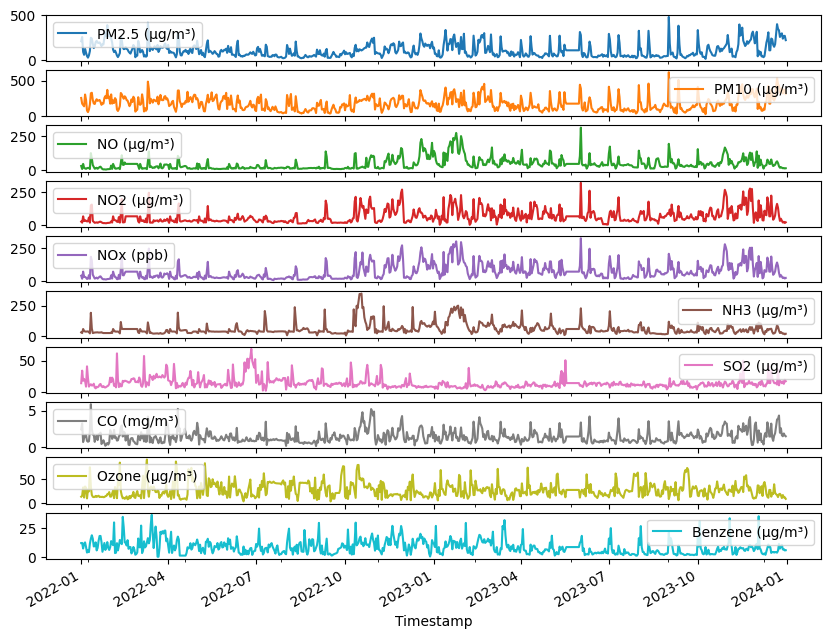

In [ ]:
df.set_index('Timestamp')[['PM2.5 (µg/m³)', 'PM10 (µg/m³)','NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)','NH3 (µg/m³)','SO2 (µg/m³)','CO (mg/m³)','Ozone (µg/m³)','Benzene (µg/m³)']].plot(subplots=True)

In [ ]:
df_input=df[['PM2.5 (µg/m³)', 'PM10 (µg/m³)','NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)','NH3 (µg/m³)','SO2 (µg/m³)','CO (mg/m³)','Ozone (µg/m³)','Benzene (µg/m³)']]

In [ ]:
df_input

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³)
0,208.840000,254.510000,32.200000,26.860000,40.470000,28.740000,14.130000,2.420000,13.340000,11.920000
1,240.990000,304.710000,35.100000,28.880000,43.900000,28.130000,15.780000,1.950000,13.620000,13.650000
2,211.720000,265.120000,33.080000,28.230000,41.640000,28.630000,15.420000,1.540000,15.090000,15.890000
3,168.090000,213.670000,39.080000,31.680000,48.460000,28.410000,18.600000,2.710000,13.090000,9.590000
4,213.470000,251.850000,50.860000,39.470000,62.350000,26.660000,14.230000,3.320000,10.080000,15.020000
...,...,...,...,...,...,...,...,...,...,...
725,296.347826,395.471015,18.943403,33.132986,33.034375,25.367708,14.104861,1.600208,10.556944,10.318646
726,236.690972,318.236111,15.213768,19.757971,22.882971,18.124275,16.976449,1.461736,16.723913,6.322971
727,265.812500,371.000000,16.985069,25.375347,27.303472,20.090278,13.085145,1.846771,11.776389,6.652153
728,268.810606,371.356061,13.923264,16.406250,20.043056,13.475347,19.749306,1.567813,12.094792,5.515313


In [ ]:
df_input.describe()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³)
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,106.580390,173.905045,47.395384,67.313829,71.352913,56.829958,14.300420,1.422739,27.186058,8.428406
std,78.785429,95.834008,43.951007,53.164310,58.378722,48.009958,8.565921,0.871604,14.843024,6.172385
min,11.131944,24.781250,6.140000,2.296667,7.340000,3.600000,2.130000,0.100000,3.650000,0.000000
25%,46.005000,95.372083,16.900000,30.666372,28.174740,30.585602,9.330407,0.824911,15.785000,3.593333
50%,81.402917,160.300347,35.383160,49.485000,51.658264,40.252049,12.156944,1.200243,24.758125,7.374412
75%,145.852604,230.445000,56.285208,85.909828,93.840521,63.175781,15.427500,1.756467,34.245000,11.417500
max,479.845238,618.541667,314.907051,322.857246,323.138333,349.080000,68.380000,5.890000,89.460000,36.500000


In [ ]:
x=df_input['PM2.5 (µg/m³)']>200
for i in x:
  if(i is True):
    print(i)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.42181022, 0.38690479, 0.0844002 , ..., 0.40069085, 0.1129239 ,
        0.32657534],
       [0.49040225, 0.47145068, 0.09379239, ..., 0.31951641, 0.11618692,
        0.3739726 ],
       [0.4279547 , 0.40477395, 0.08725024, ..., 0.24870466, 0.1333178 ,
        0.43534247],
       ...,
       [0.54336107, 0.58309503, 0.03512379, ..., 0.30168754, 0.09470212,
        0.18225076],
       [0.54975753, 0.5836947 , 0.02520756, ..., 0.2535082 , 0.09841268,
        0.15110445],
       [0.44608678, 0.47982199, 0.02985867, ..., 0.23498969, 0.06138805,
        0.15542333]])

In [ ]:
features=data_scaled
target=data_scaled[:,0] # the PM2.5 is considered target here

In [ ]:
TimeseriesGenerator(features, target, length=5, sampling_rate=1, batch_size=1)[0]

(array([[[0.42181022, 0.38690479, 0.0844002 , 0.07662618, 0.10490872,
          0.07276832, 0.18113208, 0.40069085, 0.1129239 , 0.32657534],
         [0.49040225, 0.47145068, 0.09379239, 0.08292764, 0.11577009,
          0.07100266, 0.20603774, 0.31951641, 0.11618692, 0.3739726 ],
         [0.4279547 , 0.40477395, 0.08725024, 0.08089995, 0.10861362,
          0.07244992, 0.20060377, 0.24870466, 0.1333178 , 0.43534247],
         [0.33487007, 0.31812284, 0.10668237, 0.09166234, 0.13020968,
          0.07181313, 0.24860377, 0.4507772 , 0.11001049, 0.26273973],
         [0.43168832, 0.38242487, 0.14483411, 0.11596352, 0.17419345,
          0.06674771, 0.18264151, 0.55613126, 0.07493299, 0.41150685]]]),
 array([0.1427697]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle = False)
#we have to define shuffle =false as it is timestamped data and lstm will by default consider it true

In [ ]:
x_train.shape

(511, 10)

In [ ]:
x_test.shape

(219, 10)

In [ ]:
win_length=2 #as sample taking half of dataset for testing rn
batch_size=32
num_features=10
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[4.21810216e-01, 3.86904791e-01, 8.44001971e-02, 7.66261820e-02,
          1.04908723e-01, 7.27683223e-02, 1.81132075e-01, 4.00690846e-01,
          1.12923902e-01, 3.26575342e-01],
         [4.90402254e-01, 4.71450676e-01, 9.37923910e-02, 8.29276431e-02,
          1.15770085e-01, 7.10026630e-02, 2.06037736e-01, 3.19516408e-01,
          1.16186925e-01, 3.73972603e-01]],
 
        [[4.90402254e-01, 4.71450676e-01, 9.37923910e-02, 8.29276431e-02,
          1.15770085e-01, 7.10026630e-02, 2.06037736e-01, 3.19516408e-01,
          1.16186925e-01, 3.73972603e-01],
         [4.27954697e-01, 4.04773951e-01, 8.72502422e-02, 8.08999452e-02,
          1.08613619e-01, 7.24499247e-02, 2.00603774e-01, 2.48704663e-01,
          1.33317795e-01, 4.35342466e-01]],
 
        [[4.27954697e-01, 4.04773951e-01, 8.72502422e-02, 8.08999452e-02,
          1.08613619e-01, 7.24499247e-02, 2.00603774e-01, 2.48704663e-01,
          1.33317795e-01, 4.35342466e-01],
         [3.34870074e-01, 3.18122840e-0

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#in time series we take each and every observation into account so return seq is true
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3)) #no overfit
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 2, 128)            71168     
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 2, 128)            0         
                                                                 
 lstm_40 (LSTM)              (None, 2, 128)            131584    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 2, 128)            0         
                                                                 
 dropout_26 (Dropout)        (None, 2, 128)            0         
                                                                 
 lstm_41 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_27 (Dropout)        (None, 64)              

In [ ]:
#since we dont want to run forever we say that stop early if
# 2 epochs dont have a significant difference in val_loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=4,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])
#in real world we can have train data and test data seperately
#but for project purpose i have considered it in one only
history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


<ipython-input-336-48150e2c6e16>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


16/16 [==============================] - 11s 164ms/step - loss: 0.0438 - mean_absolute_error: 0.1509 - val_loss: 0.0325 - val_mean_absolute_error: 0.1336
Epoch 2/50
16/16 [==============================] - 0s 22ms/step - loss: 0.0223 - mean_absolute_error: 0.1204 - val_loss: 0.0272 - val_mean_absolute_error: 0.1384
Epoch 3/50
16/16 [==============================] - 0s 22ms/step - loss: 0.0192 - mean_absolute_error: 0.1056 - val_loss: 0.0246 - val_mean_absolute_error: 0.1225
Epoch 4/50
16/16 [==============================] - 0s 23ms/step - loss: 0.0165 - mean_absolute_error: 0.0969 - val_loss: 0.0195 - val_mean_absolute_error: 0.1086
Epoch 5/50
16/16 [==============================] - 0s 22ms/step - loss: 0.0141 - mean_absolute_error: 0.0892 - val_loss: 0.0163 - val_mean_absolute_error: 0.0888
Epoch 6/50
16/16 [==============================] - 0s 22ms/step - loss: 0.0130 - mean_absolute_error: 0.0820 - val_loss: 0.0154 - val_mean_absolute_error: 0.0798
Epoch 7/50
16/16 [=============

In [ ]:
model.evaluate(test_generator, verbose=0)

[0.0076034110970795155, 0.05117360129952431]

In [ ]:
predictions=model.predict(test_generator)

7/7 [==============================] - 2s 6ms/step


In [ ]:
predictions.shape[0]

217

In [ ]:
predictions

array([[0.19892554],
       [0.19892554],
       [0.19892554],
       [0.19892554],
       [0.19892554],
       [0.11897855],
       [0.08434488],
       [0.11610398],
       [0.11049561],
       [0.12320249],
       [0.12115203],
       [0.09448377],
       [0.08266336],
       [0.07817949],
       [0.07282801],
       [0.07840082],
       [0.09127435],
       [0.08217205],
       [0.06956328],
       [0.07054968],
       [0.06499003],
       [0.05932155],
       [0.05563147],
       [0.07094224],
       [0.07662995],
       [0.08369689],
       [0.10082191],
       [0.1222572 ],
       [0.09058756],
       [0.09030871],
       [0.09318188],
       [0.08471419],
       [0.09117904],
       [0.07816601],
       [0.05737066],
       [0.06669743],
       [0.10355215],
       [0.11314133],
       [0.09796464],
       [0.07590446],
       [0.06467384],
       [0.06104119],
       [0.05552307],
       [0.05718533],
       [0.06489774],
       [0.06878309],
       [0.06850231],
       [0.071

In [ ]:
y_test

array([0.2036393 , 0.2036393 , 0.2036393 , 0.2036393 , 0.2036393 ,
       0.2036393 , 0.08274722, 0.08497702, 0.1302102 , 0.09715643,
       0.12141692, 0.09574379, 0.06729416, 0.05738968, 0.04968537,
       0.05271524, 0.05867867, 0.07022031, 0.05270042, 0.03946235,
       0.04409975, 0.04434421, 0.0386771 , 0.03589487, 0.07990255,
       0.06831646, 0.07653192, 0.09111116, 0.11038642, 0.05098177,
       0.09342213, 0.07448731, 0.06107886, 0.09103676, 0.04304782,
       0.03739552, 0.06412354, 0.11317183, 0.10073381, 0.0820805 ,
       0.05467836, 0.05403386, 0.04509242, 0.03872155, 0.04518872,
       0.06521251, 0.06154556, 0.06348645, 0.06677829, 0.07231677,
       0.04407753, 0.08749574, 0.06804977, 0.0499891 , 0.07466511,
       0.08613267, 0.05577474, 0.03903269, 0.04460349, 0.07588742,
       0.0349657 , 0.07193156, 0.06512362, 0.01534194, 0.02214247,
       0.07519107, 0.02878744, 0.03155062, 0.03809928, 0.0563896 ,
       0.05911574, 0.03400266, 0.0383067 , 0.03098761, 0.04287

In [ ]:
x_test

array([[0.2036393 , 0.25115146, 0.1336133 , ..., 0.22845226, 0.27428106,
        0.23091522],
       [0.2036393 , 0.25115146, 0.1336133 , ..., 0.22845226, 0.27428106,
        0.23091522],
       [0.2036393 , 0.25115146, 0.1336133 , ..., 0.22845226, 0.27428106,
        0.23091522],
       ...,
       [0.54336107, 0.58309503, 0.03512379, ..., 0.30168754, 0.09470212,
        0.18225076],
       [0.54975753, 0.5836947 , 0.02520756, ..., 0.2535082 , 0.09841268,
        0.15110445],
       [0.44608678, 0.47982199, 0.02985867, ..., 0.23498969, 0.06138805,
        0.15542333]])

In [ ]:
x_test[:,1:][win_length:]

array([[0.25115146, 0.1336133 , 0.20282332, ..., 0.22845226, 0.27428106,
        0.23091522],
       [0.25115146, 0.1336133 , 0.20282332, ..., 0.22845226, 0.27428106,
        0.23091522],
       [0.25115146, 0.1336133 , 0.20282332, ..., 0.22845226, 0.27428106,
        0.23091522],
       ...,
       [0.58309503, 0.03512379, 0.07199476, ..., 0.30168754, 0.09470212,
        0.18225076],
       [0.5836947 , 0.02520756, 0.04401534, ..., 0.2535082 , 0.09841268,
        0.15110445],
       [0.47982199, 0.02985867, 0.05981449, ..., 0.23498969, 0.06138805,
        0.15542333]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

,0,0,1,2,3,4,5,6,7,8
0,0.198926,0.251151,0.133613,0.202823,0.202702,0.154075,0.183704,0.228452,0.274281,0.230915
1,0.198926,0.251151,0.133613,0.202823,0.202702,0.154075,0.183704,0.228452,0.274281,0.230915
2,0.198926,0.251151,0.133613,0.202823,0.202702,0.154075,0.183704,0.228452,0.274281,0.230915
3,0.198926,0.251151,0.133613,0.202823,0.202702,0.154075,0.183704,0.228452,0.274281,0.230915
4,0.198926,0.123664,0.117141,0.138082,0.090827,0.142272,0.545613,0.073978,0.101082,0.100537
...,...,...,...,...,...,...,...,...,...,...
212,0.468677,0.624309,0.041466,0.096195,0.081363,0.063007,0.180753,0.259103,0.080491,0.282703
213,0.488914,0.494231,0.029387,0.054471,0.049218,0.042041,0.224097,0.235188,0.152359,0.173232
214,0.426415,0.583095,0.035124,0.071995,0.063216,0.047731,0.165361,0.301688,0.094702,0.182251
215,0.435731,0.583695,0.025208,0.044015,0.040225,0.028584,0.265952,0.253508,0.098413,0.151104


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[104.37098942, 173.90504527,  47.39538392, ...,   1.42273856,
         27.186058  ,   8.4284055 ],
       [104.37098942, 173.90504527,  47.39538392, ...,   1.42273856,
         27.186058  ,   8.4284055 ],
       [104.37098942, 173.90504527,  47.39538392, ...,   1.42273856,
         27.186058  ,   8.4284055 ],
       ...,
       [210.99815424, 371.        ,  16.98506944, ...,   1.84677083,
         11.77638889,   6.65215278],
       [215.36489558, 371.3560606 ,  13.92326389, ...,   1.5678125 ,
         12.09479167,   5.5153125 ],
       [219.25713263, 309.6805556 ,  15.359375  , ...,   1.46059028,
          8.91770833,   5.67295139]])

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

PM2.5 (µg/m³)      217
PM10 (µg/m³)       217
NO (µg/m³)         217
NO2 (µg/m³)        217
NOx (ppb)          217
NH3 (µg/m³)        217
SO2 (µg/m³)        217
CO (mg/m³)         217
Ozone (µg/m³)      217
Benzene (µg/m³)    217
dtype: int64

In [ ]:
df_final['App_Pred']=rev_trans[:,0]

<ipython-input-350-62669267b60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [ ]:
df_final

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),App_Pred
513,106.580390,173.905045,47.395384,67.313829,71.352913,56.829958,14.300420,1.422739,27.186058,8.428406,104.370989
514,106.580390,173.905045,47.395384,67.313829,71.352913,56.829958,14.300420,1.422739,27.186058,8.428406,104.370989
515,106.580390,173.905045,47.395384,67.313829,71.352913,56.829958,14.300420,1.422739,27.186058,8.428406,104.370989
516,106.580390,173.905045,47.395384,67.313829,71.352913,56.829958,14.300420,1.422739,27.186058,8.428406,104.370989
517,49.916667,98.208333,42.309375,46.560417,36.022917,52.752083,38.276852,0.528333,12.323810,3.669583,104.370989
...,...,...,...,...,...,...,...,...,...,...,...
725,296.347826,395.471015,18.943403,33.132986,33.034375,25.367708,14.104861,1.600208,10.556944,10.318646,230.807287
726,236.690972,318.236111,15.213768,19.757971,22.882971,18.124275,16.976449,1.461736,16.723913,6.322971,240.292595
727,265.812500,371.000000,16.985069,25.375347,27.303472,20.090278,13.085145,1.846771,11.776389,6.652153,210.998154
728,268.810606,371.356061,13.923264,16.406250,20.043056,13.475347,19.749306,1.567813,12.094792,5.515313,215.364896


<Axes: >

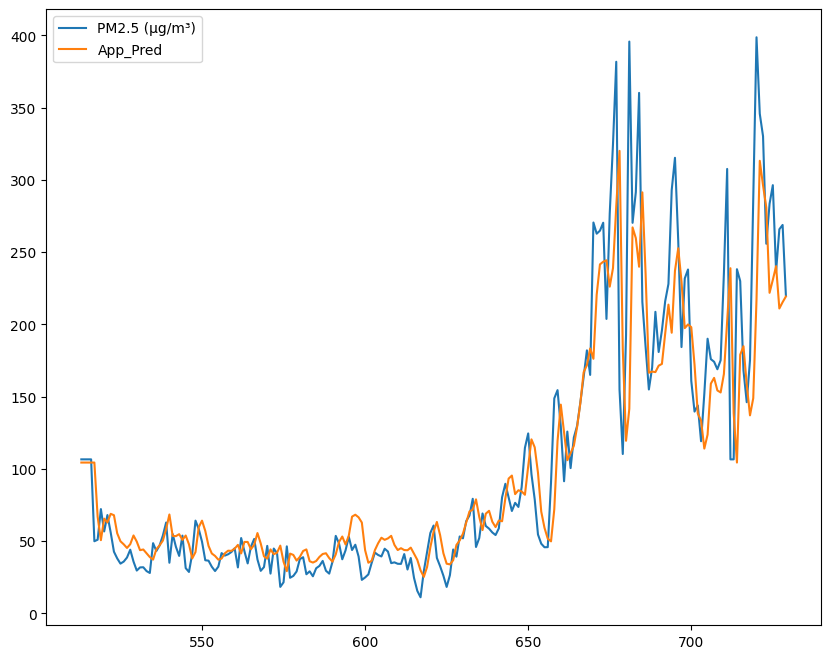

In [ ]:
df_final[['PM2.5 (µg/m³)','App_Pred']].plot()